# Ebay Car Sales Data
---
This project formed part of the "Pandas and NumPy Fundamentals" [course](https://www.dataquest.io/course/pandas-fundamentals/) of the Dataquest.io Data Scientist in Python [path.](https://www.dataquest.io/path/data-scientist/)

The purpose of this project is to implement lessons learned about NumPy and pandas to clean and explore a dataset

# Introduction

The aim of this project is to clean and analyse a dataset of used cars to identify popular brands and their average resale value. The dataset used for this project was scraped from the Ebay website and is available from [this](https://www.kaggle.com/orgesleka/used-cars-database/data) Kaggle page.

In [1]:
#Import packages and read in csv file
import pandas as pd
import numpy as np

autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [2]:
#Print info about dataset and the first 5 rows to get a preview of the data
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


# Observations

The dataset contains 20 columns, most of which are strings. Some columns have up to 20% null values. The column names use camelcase instead of snakecase, which means we can't just replace spaces with underscores.

Let's check the name of each column and then use a dictionary to rename the columns using snakecase. This will improve readability and remove the need to remember the location of capital letters when accessing columns.

In [4]:
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


In [5]:
#Dictionary for renaming of columns in autos dataset
corrected_col_names = {'dateCrawled':'date_crawled', 'yearOfRegistration': 'registration_year', 
                       'monthOfRegistration': 'registration_month', 'notRepairedDamage': 'unrepaired_damage', 
                       'dateCreated': 'ad_created', 'nrOfPictures': 'num_pictures', 'odometer': 'odometer_km', 
                       'offerType' : 'offer_type', 'vehicleType' : 'vehicle_type', 'fuelType' : 'fuel_type',
                       'lastSeen' : 'last_seen', 'postalCode' : 'postal_code', 'powerPS' : 'power_ps',}

In [6]:
#Use df.rename to change column names according to corrected_col_names dictionary
autos.rename(columns = corrected_col_names, inplace = True)
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


# Data Cleaning
---


In [7]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-25 19:57:10,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


### Remove unnecessary data

There are a few columns that have very few unique values and these may be worth removing to reduce the size and complexity of the dataset. The 'seller', 'offer_type', 'abtest', 'gearbox' and 'unrepaired_damage' columns all have only 2 unique values which are likely to be "yes" or "no" type values.

In the case of the 'gearbox' column, the 2 unique values would indicate whether the car is automatic or manual. That informaiton is useful when evaluating the resale price of vehicles, so that column should be retained. 

The 'seller', 'offer_type' and 'abtest' all have only 2 unique columns which would not significantly impact the resale price, so let's remove those columns. Additionally, the 'postal_code' , 'num_pictures' and 'last_seen' columns offer no meaningful data when evaluating the price of a vehicle and can also be removed.

In [8]:
autos = autos.drop(columns=['seller','offer_type','abtest','num_pictures', 'postal_code', 'last_seen'])

### Correct column data types

Intuitively, the mean of the 'price' and 'odometer' columns should exist since these are expected to be columns of numerical data. Since the mean of these columns is NaN, we can expect that some or all of the data in those columns is text data.

As shown in the autos.describe() table above, the first values in the price and odometer columns are $0 and 150,000km respectively. The presence of text data in any cell of a dataframe column will cause the column to be stored as an object instead of a numerical datatype. All of the text characters need to be removed before the column can be converted to a float data type. Let's check the data type of each column and then make corrections if and where required

In [9]:
autos.dtypes

date_crawled          object
name                  object
price                 object
vehicle_type          object
registration_year      int64
gearbox               object
power_ps               int64
model                 object
odometer_km           object
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
dtype: object

In [10]:
#Replace text characters in price and odometer columns with blanks and then convert column to float
autos['price'] = (autos['price'].str.replace('$','')
                  .str.replace(',','')
                  .astype(float))

autos['odometer_km'] = (autos['odometer_km'].str.replace('km','')
                      .str.replace(',','')
                      .astype(float))

In [11]:
#Print statistical information about price column to confirm conversion has worked and then
#check for unrealistic values at beginning and end of column
print('Unique values in price column:', autos['price'].unique().shape[0])
print(autos['price'].describe().apply(lambda x: format(x, 'f')))

print('\n20 highest prices:')
print(autos['price'].value_counts().sort_index(ascending = False).head(20))

print('\n20 lowest prices:')
print(autos['price'].value_counts().sort_index(ascending = True).head(20))

Unique values in price column: 2357
count       50000.000000
mean         9840.043760
std        481104.380500
min             0.000000
25%          1100.000000
50%          2950.000000
75%          7200.000000
max      99999999.000000
Name: price, dtype: object

20 highest prices:
99999999.0    1
27322222.0    1
12345678.0    3
11111111.0    2
10000000.0    1
3890000.0     1
1300000.0     1
1234566.0     1
999999.0      2
999990.0      1
350000.0      1
345000.0      1
299000.0      1
295000.0      1
265000.0      1
259000.0      1
250000.0      1
220000.0      1
198000.0      1
197000.0      1
Name: price, dtype: int64

20 lowest prices:
0.0     1421
1.0      156
2.0        3
3.0        1
5.0        2
8.0        1
9.0        1
10.0       7
11.0       2
12.0       3
13.0       2
14.0       1
15.0       2
17.0       3
18.0       1
20.0       4
25.0       5
29.0       1
30.0       7
35.0       1
Name: price, dtype: int64


### Remove rows containing outliers and/or invalid data
Data which was entered into the dataset incorrectly can have a large impact on any statistical analyses of the data. If a number of prices were recorded with one or more additional zeros, the mean of the data could be significantly skewed. For this reason, it is important to remove any rows that seem to contain incorrect data.

There are 2357 unique prices in the prices column and over 1500 are below $30. These seem unrealistic, but they could be initial prices of an auction so these rows will be retained. 

Prices above $130 000 (the 7th highest price) seem unrealistic and will therefore be removed from the dataset.

In [12]:
#Remove rows with price above $130 000
autos = autos.drop(autos[autos['price'] > 1300000].index)

#Print stats on price column. Use format to remove scientific notation
autos['price'].describe().apply(lambda x: format(x, 'f'))

count      49991.000000
mean        5831.663920
std        14273.367126
min            0.000000
25%         1100.000000
50%         2950.000000
75%         7200.000000
max      1300000.000000
Name: price, dtype: object

Let's repeat a similar exercise for the odometer column:

In [13]:
print(autos['odometer_km'].describe())

print('\nSorted odometer values:')
print(autos['odometer_km'].value_counts().sort_index(ascending = False))

count     49991.000000
mean     125736.432558
std       40038.005358
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

Sorted odometer values:
150000.0    32419
125000.0     5170
100000.0     2168
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1026
40000.0       818
30000.0       789
20000.0       784
10000.0       264
5000.0        966
Name: odometer_km, dtype: int64


There don't appear to be any signifcant outliers or rows that would cause significant skewing of results in the odometer column, so no actiona will be taken to remove rows based on that column.

The autos.describe() table above indicated that the min and max values in the 'registration_year' column are 1000 and 9999 respectively. Both of these are clearly incorrect. Let's check what percentage of the data is outside the range 1900 - 2019 which is a more realistic range of registration years.

In [14]:
print("Percentage of registration years outside range 1900 - 2019:",
      100*(1 - autos['registration_year'].between(1900,2019)).sum()/autos.shape[0], "%")

Percentage of registration years outside range 1900 - 2019: 0.048008641555479986 %


Less than 1% of the values in the column are before 1900 or after 2019. These numbers were likely entered incorrectly. There are so few that their removal will barely effect the dataset, so lets exclude them and then look at the distribution of the 'registration_year' column again:

In [15]:
autos = autos[autos['registration_year'].between(1900,2019)]
autos['registration_year'].describe()

count    49967.000000
mean      2003.367783
std          7.690190
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2019.000000
Name: registration_year, dtype: float64

The information above indicates that more than half the vehicles were registered after 2003

### Data Aggregation
In order to explore variations in the data across differenct car brands, the data will be aggregated according to brand. Lets see which brands are most popular in the dataset:

In [16]:
brand_counts = 100*(autos['brand'].value_counts(normalize=True).sort_values(ascending = False))
print(brand_counts)

volkswagen        21.376108
opel              10.921208
bmw               10.863170
mercedes_benz      9.468249
audi               8.571657
ford               6.960594
renault            4.811175
peugeot            2.913923
fiat               2.615726
seat               1.881242
skoda              1.571037
mazda              1.515000
nissan             1.508996
smart              1.402926
citroen            1.398923
toyota             1.234815
sonstige_autos     1.080713
hyundai            0.976645
volvo              0.912602
mini               0.848560
mitsubishi         0.808534
honda              0.798527
kia                0.712470
alfa_romeo         0.658435
porsche            0.588388
suzuki             0.586387
chevrolet          0.566374
chrysler           0.362239
dacia              0.258170
daihatsu           0.256169
jeep               0.218144
subaru             0.216143
land_rover         0.198131
daewoo             0.158104
saab               0.158104
trabant            0

The price of vehicles belonging to a brand that account for at least 2% of the market share are assessed below using a dictionary with the appropriate brands

audi: $8965
mercedes_benz: $8380
bmw: $8254
volkswagen: $5345
ford: $3913
peugeot: $3010
opel: $2842
fiat: $2697
renault: $2351


([<matplotlib.axis.XTick at 0x28c050d5ba8>,
 <a list of 9 Text xticklabel objects>)

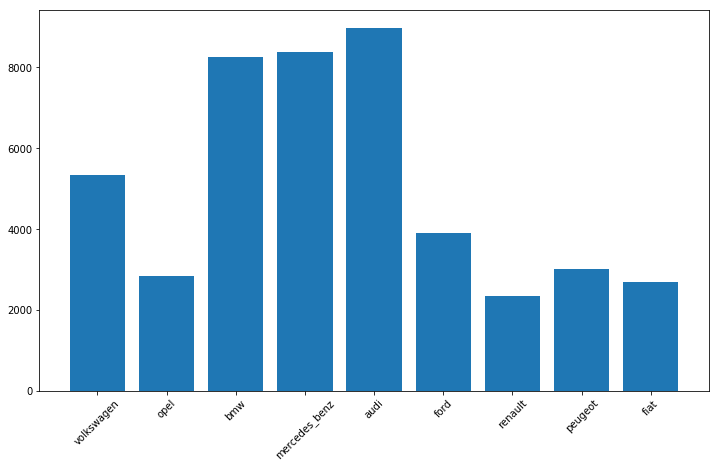

In [19]:
import matplotlib.pyplot as plt

popular_brands = brand_counts[brand_counts > 2]
mean_brand_price = {}

for brand in popular_brands.index:
    brand_only = autos[autos['brand'] == brand]
    mean_price = brand_only['price'].mean()
    mean_brand_price[brand] = int(mean_price)

#Print mean price for popular brands
for key, val in sorted(mean_brand_price.items(), key = lambda item: item[1], reverse = True):
    print(key + ": ${}".format(val))

plt.figure(figsize = (12,7))
plt.bar(range(len(mean_brand_price)),list(mean_brand_price.values()))
plt.xticks(range(len(mean_brand_price)), list(mean_brand_price.keys()), rotation = 45)

From the data above, it is clear that Audi, BMW and Mercedes Benz are the most expensive vehicle types in this dataset. Volkswagen is a little cheaper than those 3 brands and the remainder are significantly cheaper.

We have observed a distinct price gap within the top 6 car brands. Lets look deeper and see if the average 
mileage of cars in the top 6 brands has any significant impact on the price of the vehicle.

In [18]:
top_six = ['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford']
brand_mean_mileage = {}
brand_mean_price = {}

for brand in top_six:
    isolated = autos[autos['brand'] == brand]
    
    mean_mileage = isolated['odometer_km'].mean()
    brand_mean_mileage[brand] = mean_mileage
    
    mean_price = isolated['price'].mean()
    brand_mean_price[brand] = mean_price

#Use series constructor to convert these dictionaries to series objects
mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending = False)
mean_price = pd.Series(brand_mean_price).sort_values(ascending = False)

#Create dataframe with both series as columns
comparison = pd.DataFrame(data = mean_mileage, columns = ['Mileage'])
comparison['Price'] = mean_price

comparison

,Mileage,Price
bmw,132544.215181,8254.439388
mercedes_benz,130933.206510,8380.637920
audi,129643.941163,8965.560355
opel,129361.370717,2842.824629
volkswagen,129010.392285,5345.682895
ford,124153.248994,3913.021564


Interestingly, mileage seems to have little impact on the price of the top brands. Despite all 6 top brands having roughly between 124000 and 133000 miles on the odometer, there is still a large variation in their prices.

# Conclusion
---
The autos dataset was analysed in this project to identify popular vehicle brands and the average price of second hand vehicles made by each of those brands.

The dataset was first cleaned and optimised to enable statistical analysis of relevant columns and reduce the amount of data that had to be processed.

It was shown that the 9 most popular vehicle brands, ranked in order of resale value, were Audi, Mercedes-Benz, BMW, Volkswagen, Ford, Peugot, Opel, Fiat and Renault. The top 3 brands were siginifcantly more expensive than other popular brands with the exception of Volskwagen. The average price of the top 3 (Audi, Mercedes-Benz and BMW) was \\$8533 and the average Volskwagen resale value was \\$5345. The average price of the other 5 brands making up the top 9 was just \\$2963.